# 1º Avaliação de Aprendizado de Máquina (GDEST0106)

---
Aluno: Diogo Dias da Silva

Matrícula: 20220028795

---

### Questão 1: 

Disserte sobre o processo de treinamento de modelo de regressão em aprendizagem de máquina. Explique cada um dos passos considerando a imagem que segue:

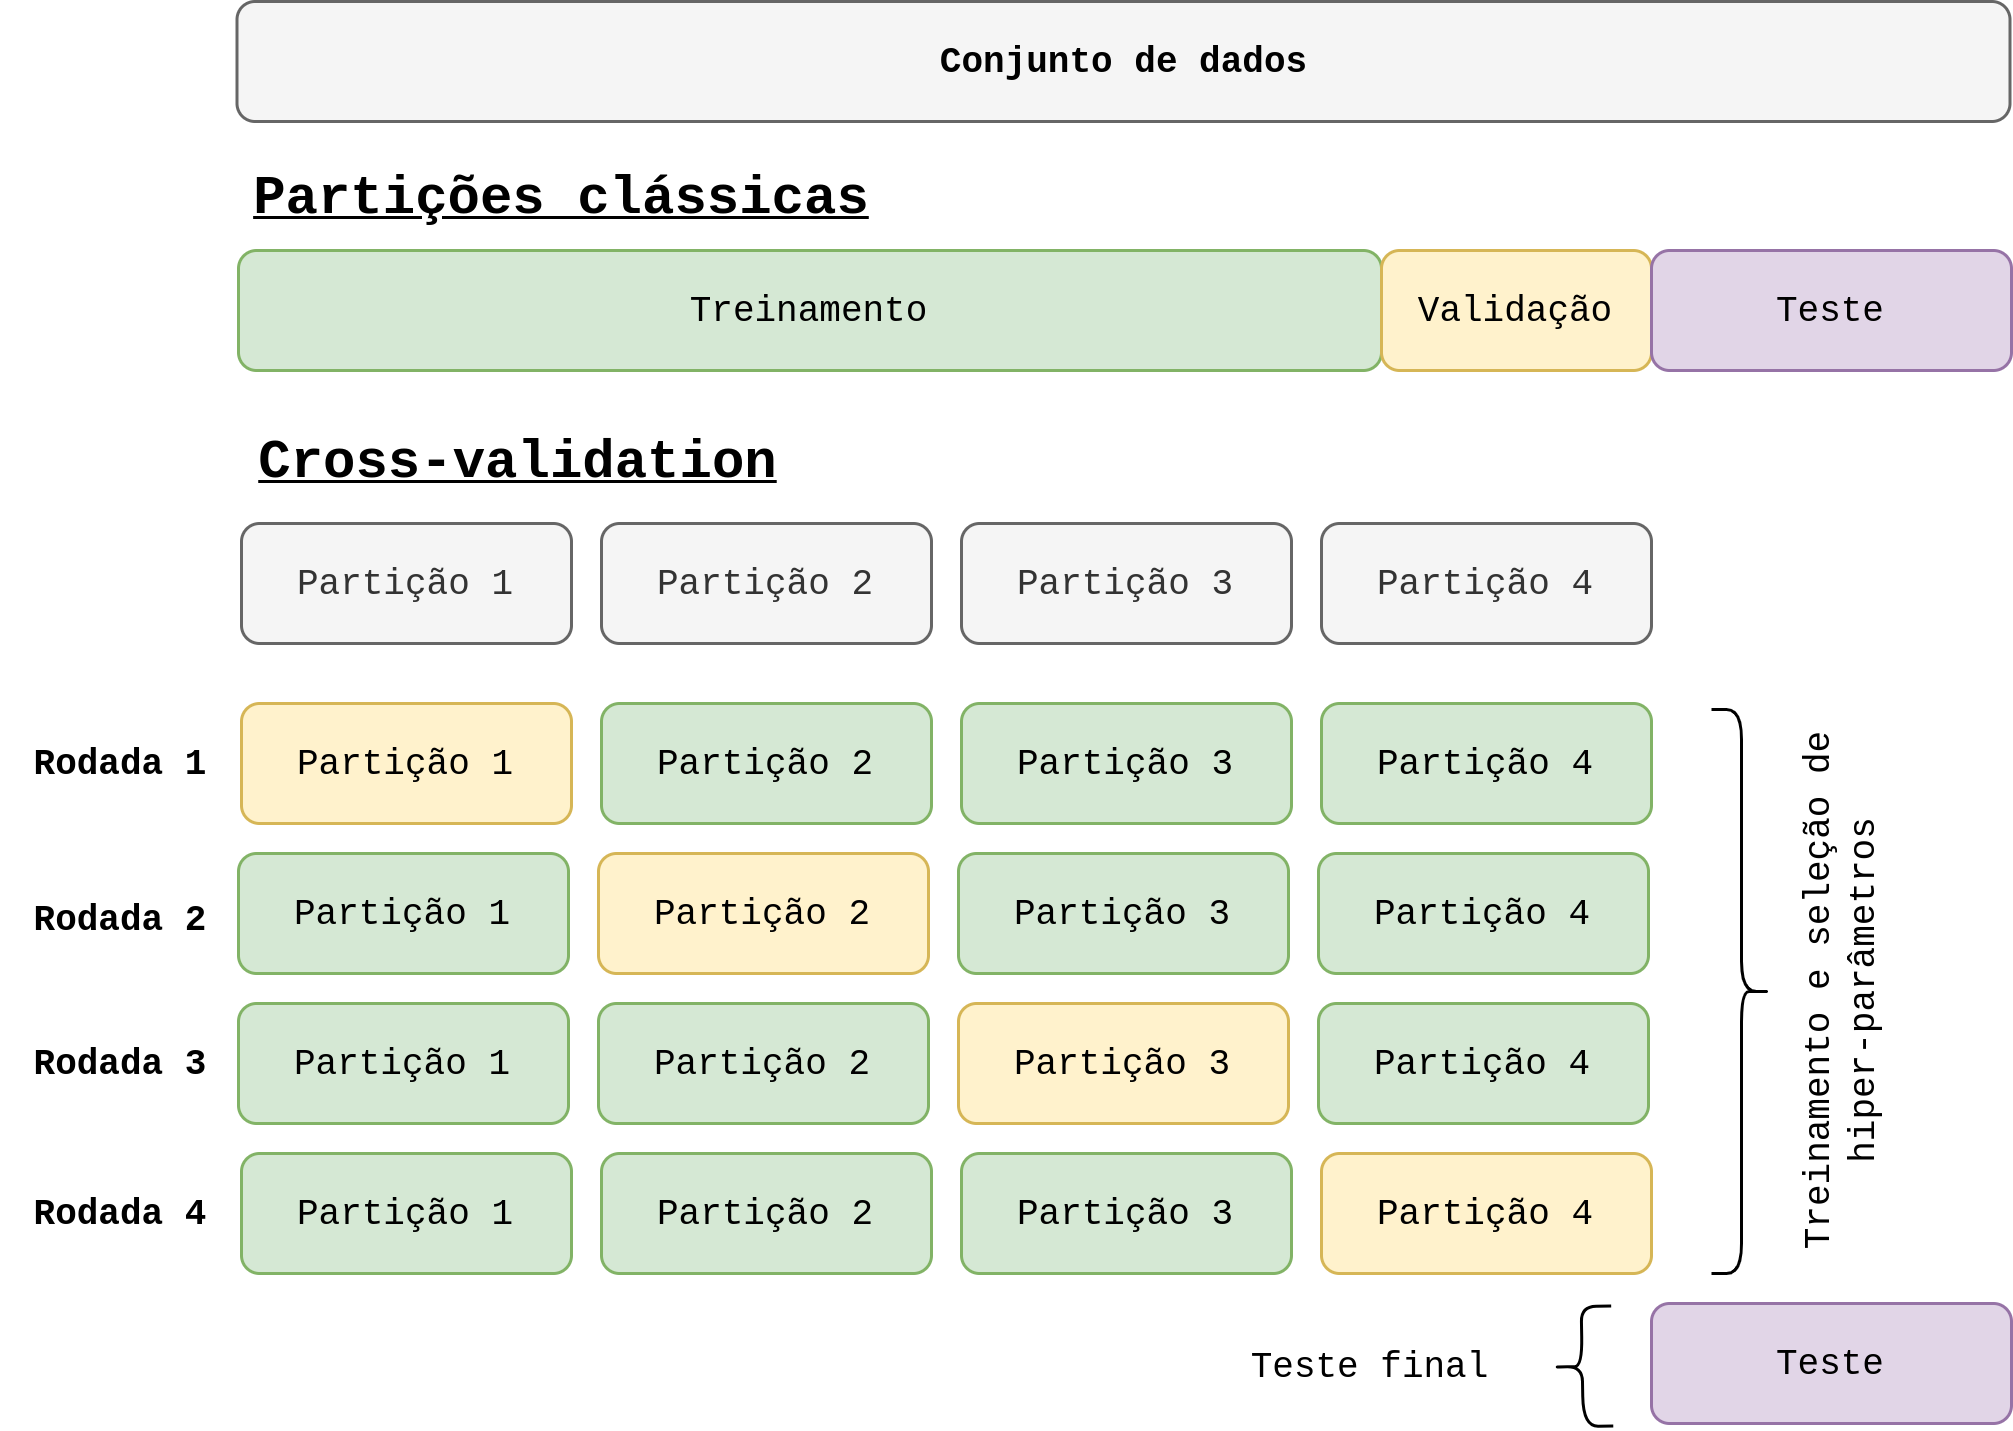

Esquema de treinamento de um modelo de aprendizagem ed máquina usando validação cruzada.


### Resposta:

Antes do treinamento do modelo em si, é de extrema importância realizar uma análise exploratória e as respectivas transformações e inputações de dados, usando técnicas estatísticas e matemáticas. 

Em seguida, vem a parte de repartir o conjunto de dados em conjuntos de treino e teste (hold out), para conseguir avaliar de forma eficaz o desempenho do modelo e impedir o overfitting (sobreajuste) do modelo.

Usar todo conjunto de treino e avaliar as métricas do modelo com o mesmo conjunto acarretaria em um falso desempenho positivo. 

Não existe uma regra para a proporção da divisão dos dados. O mais usado é 70/30 (70 para treino e 30 para teste).

Há tecnicas utilizadas para um treinamento mais eficiente do modelo e validação mais robusta, muitas vezes o cojunto de teste é dividido em teste e validação, onde o conjunto de validação é usado para ajustar os hiperparâmetros e o de teste para observar o desempenho do modelo.

Uma técnica mais robusta (representada na imagem) é a de Cross-Validation (Validação cruzada), onde TODO o conjunto de Treinamento é dividido em partes iguais ou quase iguais que são chamados de (k-folds) onde k é o número de folds, com o objetivo de captar o melhor hiperparâmetro. Em cada "rodada" uma parte dessas é reservada pra validação e o restante pra treino. Isso se repete até que todas as partes tenham sido validadas e testadas. É ótimo, pois garante uma avaliação de perfomance do modelo bem mais robusta.

Existe também o leave-one-out cross-validation, que tem um custo computacional maior, porque, vamos supor que se tem um conjunto de dados com 1000 observações, o modelo vai realizar MIL INTERAÇÕES e em cada interação UMA observação é retirada e  usada como conjunto de validação e todas as outras usadas como treino. A média da métrica de avaliação escolhida é tirada e esse é o resultado final. Esse método requer, como eu disse anteriormente, um GRANDE custo computacional, porque, imagina que ao invés de apenas 1000 observações meu conjunto de dados tivessem 1.000.000?

Bom, depois de escolher a melhor métrica para a avaliação do modelo, se treina, avalia o desempenho e salva a receita (ou pipeline) para que o modelo consiga ser replicado em testes posteriores!

---

### Questão 2: 

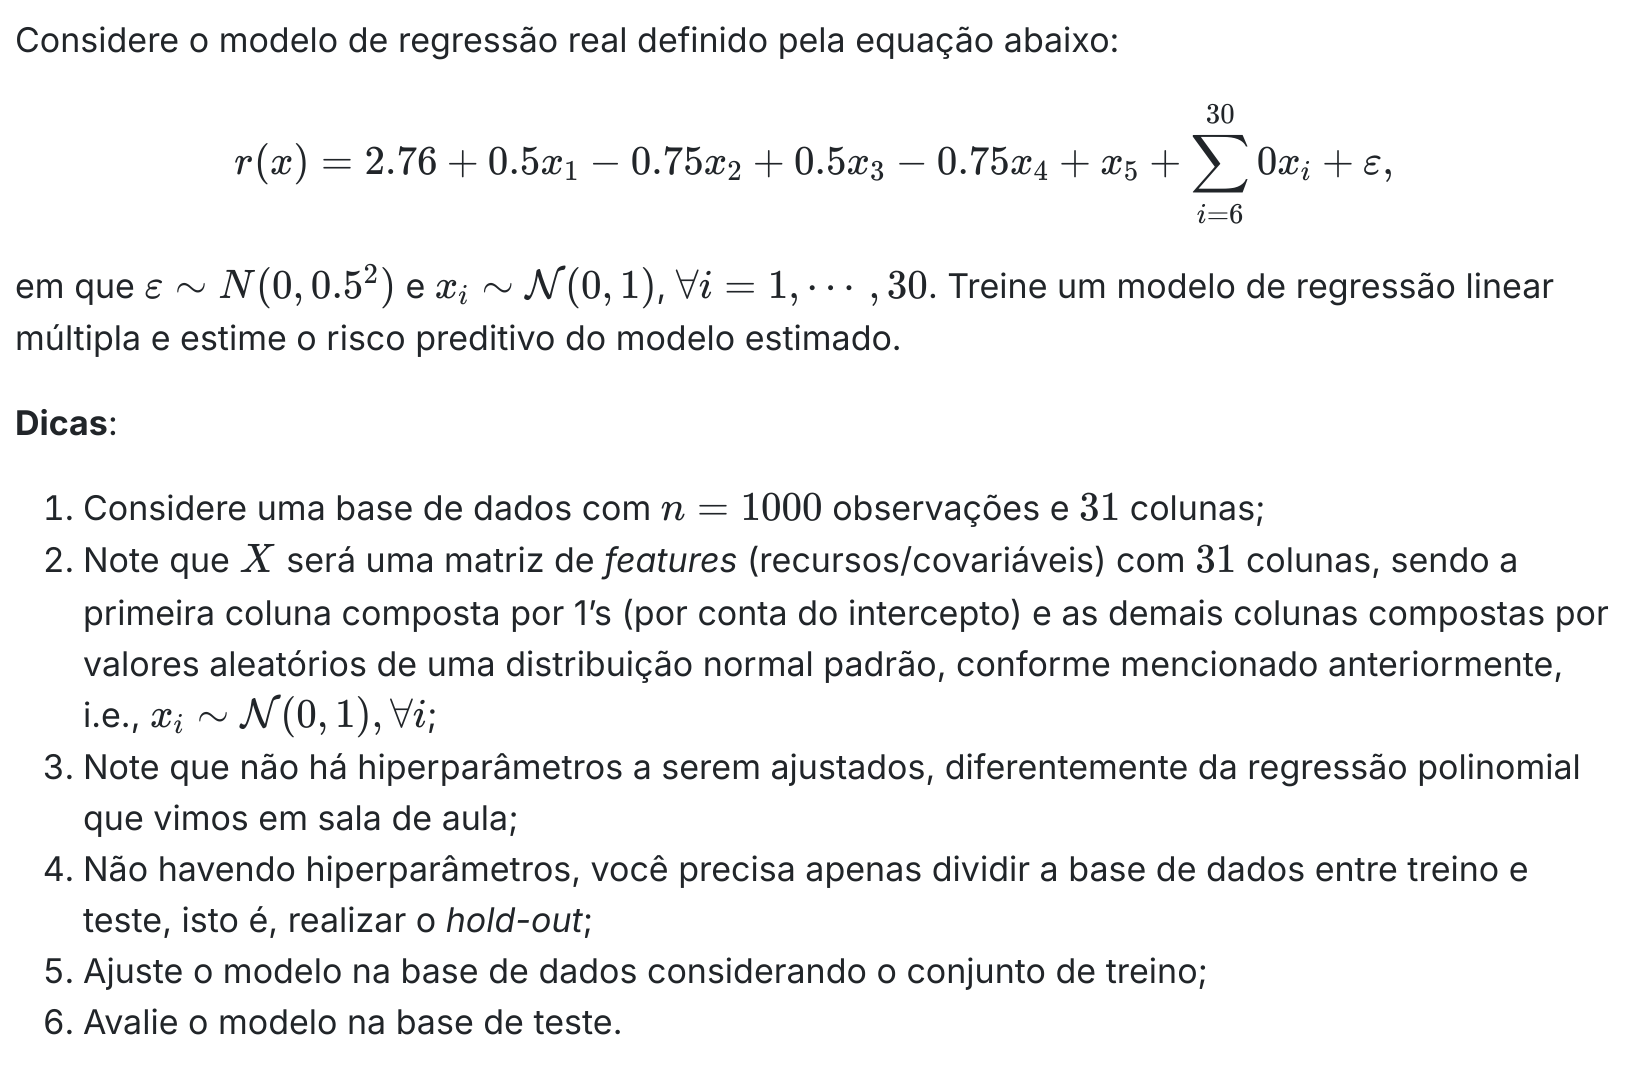


In [485]:
# Importando as Bibliotecas Necessárias

import numpy as np # Para álgebra linear
import pandas as pd # Para tratamento de dados
from sklearn.linear_model import LinearRegression # Para modelagem
from sklearn.metrics import mean_squared_error # Métrica do EQM
from sklearn.model_selection import train_test_split # Divisão de treino e teste

##### Gerando Dados de acordo com a equação proposta

O código está seguindo as boas práticas de tipagem em python professor. A função não aceita outras observações que não sejam (1000 e 31) mas, ela pode ser modificada posteriormente para ser mais dinâmica.

Esse tipo de tipagem serve para que o código se torne mais fácil de debugar.
Não é uma tipagem tão robusta como em outras linguagens, mas quebra um galho na hora de debugar.

In [486]:
# Definir o número de observações e features
observacoes = 1000
features = 31

In [487]:
import numpy as np

def gerar_dados(observacoes:int, features:int) -> tuple:
    # Gerar a matriz de features (X)
    np.random.seed(0)
    X = np.random.normal(0, 1, (observacoes, features - 1))  # features - 1 variáveis independentes
    X = np.hstack([np.ones((observacoes, 1)), X])  # Adicionar coluna de 1's para o intercepto

    # Definindo os coeficientes
    coeficientes = np.array([2.76] + [0.5, -0.75, 0.5, -0.75, 1] + [0]*25)

    # Calcular a variável dependente r(x) sem o erro
    r_x = X.dot(coeficientes)

    # Adicionando o erro com distribuição normal
    erro = np.random.normal(0, 0.5, observacoes)
    r_x += erro

    return X, r_x


### Divisão em conjunto de treino e teste

| Parâmetro      | Descrição                                                                                                         |
|----------------|-------------------------------------------------------------------------------------------------------------------|
| `X`            | Features                     |
| `r_x`          | Label|
| `test_size`    | Proporção da divisão do conjunto  de teste (0.3 = 30%) |
| `random_state` | Garante que qualquer pessoa com o mesmo conjunto de dados tenha a mesma repartição com os mesmos parâmetros               |

In [488]:
# Gerar os dados
X, y = gerar_dados(1000, 31)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [489]:
# Treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [490]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Estimar o risco preditivo (EQM)
eqm = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (EQM): {eqm}")

Erro Quadrático Médio (EQM): 0.31942417122581773


In [491]:
y_pred

array([ 0.76501132,  2.0892022 ,  2.58964809,  0.12817678, -1.70849789,
        1.98287125,  3.49866594,  1.55642128,  5.25342147, -0.58577099,
        2.10203414,  4.43927097,  1.50127794,  2.61370684, -0.42065425,
        1.02928771,  3.28871754,  3.76347668,  1.59196458,  3.96767098,
        4.50923501,  3.83847301,  0.11144414,  3.20319837,  1.38099687,
        5.2273978 ,  0.41070447,  2.42813182,  2.84729962,  3.22210431,
        3.79935189,  3.69234659,  1.7394319 , -0.15704881,  3.11124959,
        2.00460391,  1.98833912,  1.2816365 ,  3.86653554,  2.55947098,
        2.2393731 ,  3.2706398 ,  4.12522862,  0.85896277,  3.74309643,
        1.14471651,  2.83071142,  2.08769436,  3.65111597,  2.57136625,
        3.49684881,  3.23930976,  1.86315329,  0.75214018,  4.40607492,
        1.82960825,  2.73832772,  2.34898606,  2.31695581,  1.54361827,
        1.11025241,  1.93536311,  0.74120555,  2.05971689,  0.91585667,
        5.0860979 ,  4.08010483,  2.16867279,  2.48729566,  4.08

### QUESTÃO 3

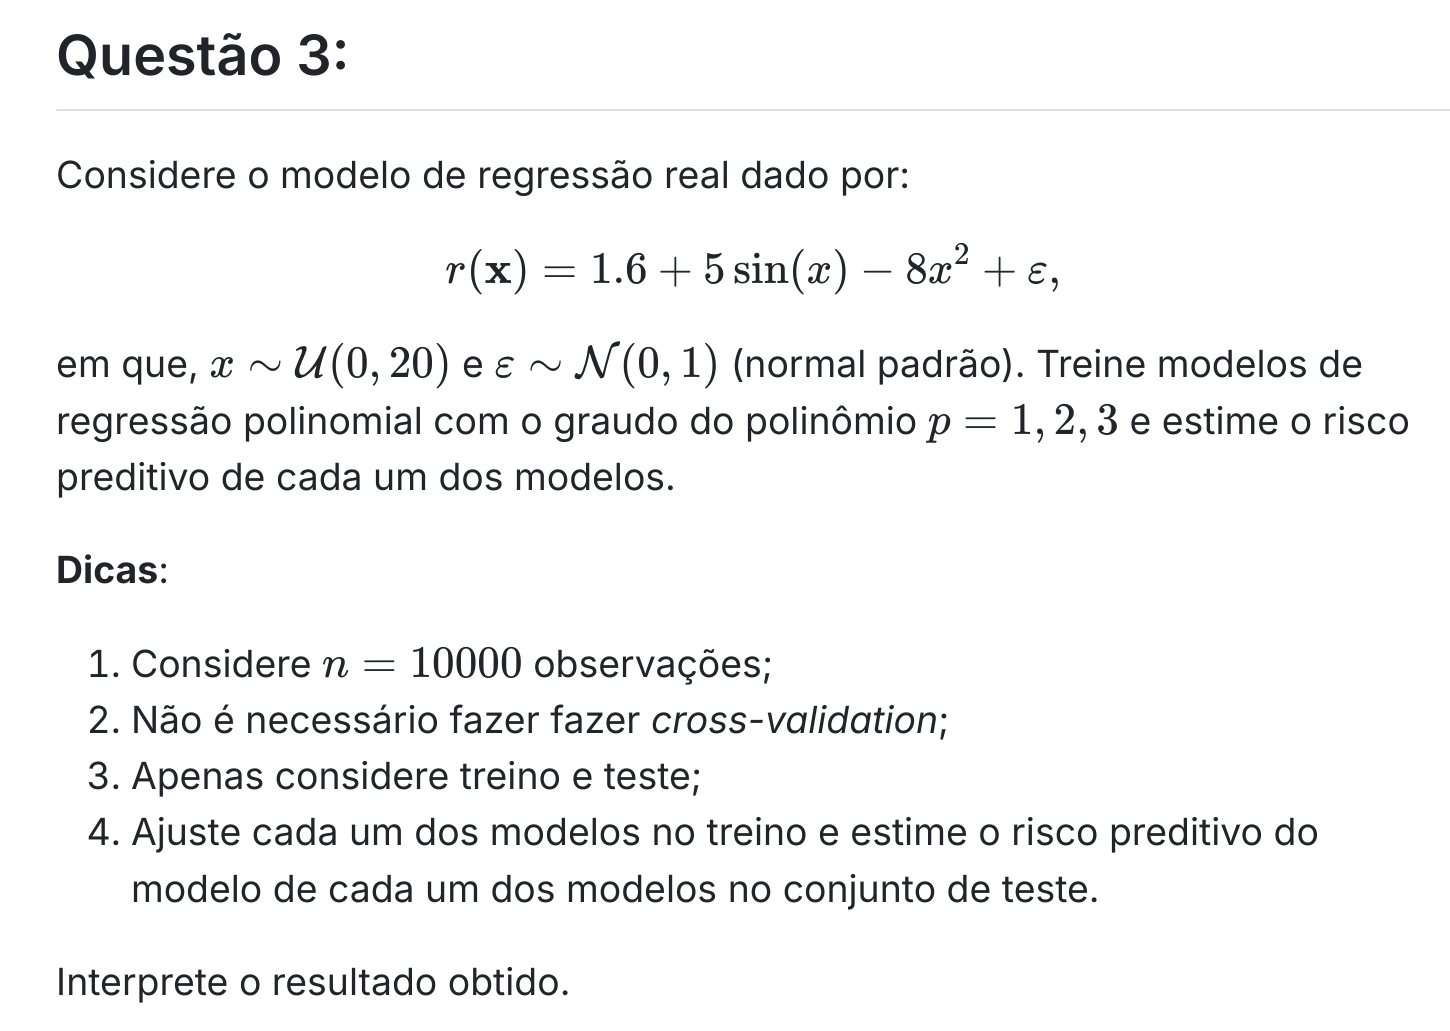

##### Gerando dados

In [492]:
def gerar_dados_2(n:int) -> np.ndarray:
    np.random.seed(42)
    n = 10000
    x = np.random.uniform(0, 20, n)
    erro = np.random.normal(0, 1, n)
    r_x = 1.6 + 5 * np.sin(x) - 8 * x**2 + erro

    return r_x

In [493]:
r_x = gerar_dados_2(1000)
r_x

array([ -444.11096308, -2891.04987084, -1708.23820388, ...,
       -2865.00177887,  -499.70969898,  -154.24308558])

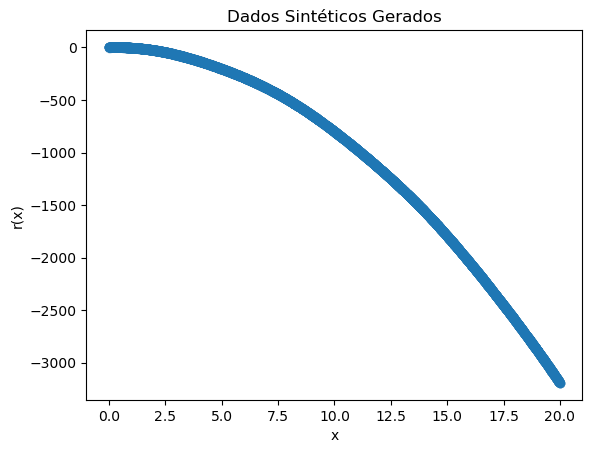

In [494]:
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
# Visualização dos dados
plt.scatter(x, r_x, alpha=0.3)
plt.xlabel('x')
plt.ylabel('r(x)')
plt.title('Dados Sintéticos Gerados')
plt.show()

##### Divisão treino e teste

In [495]:
# Dividir dados
x_train, x_test, y_train, y_test = train_test_split(x, r_x, test_size=0.3, random_state=42)


##### Importando funções necessárias para trabalhar com regressões polinomiais

In [496]:
from sklearn.preprocessing import PolynomialFeatures

##### Função para treinar o modelo

In [497]:
def treinamento_e_avaliacaco(x_train, y_train, x_test, y_test, degree):
    poly = PolynomialFeatures(degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1)) # Esse reshape é necessário para que o array não seja lido como unidimensional
    x_test_poly = poly.transform(x_test.reshape(-1, 1))

    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    r_pred_train = model.predict(x_train_poly)
    r_pred_test = model.predict(x_test_poly)

    train_eqm = mean_squared_error(y_train, r_pred_train)
    test_eqm = mean_squared_error(y_test, r_pred_test)

    return test_eqm

In [498]:
degrees = [1, 2, 3]
test_errors = {}

for d in degrees:
    test_mse = treinamento_e_avaliacaco(x_train, y_train, x_test, y_test, d)
    test_errors[d] = test_mse
    print(f'Grau {d} - EQM no conjunto de teste: {test_mse:.4f}')

Grau 1 - EQM no conjunto de teste: 56051.9748
Grau 2 - EQM no conjunto de teste: 12.9517
Grau 3 - EQM no conjunto de teste: 12.7224


##### Visualização dos dados

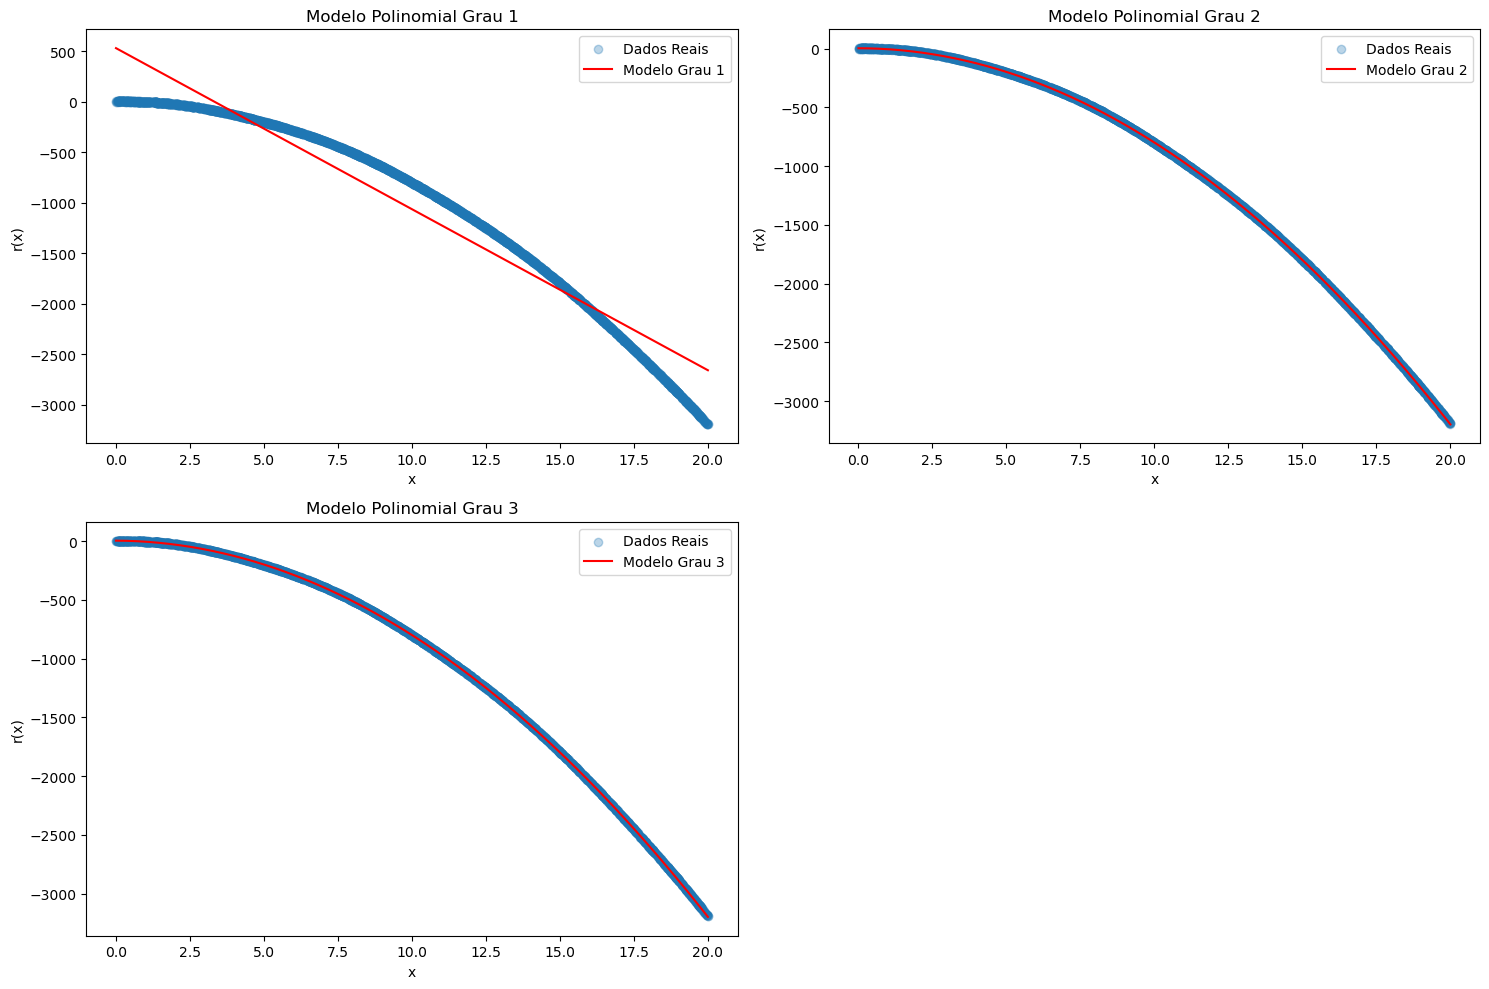

In [499]:
# Função para plotar os modelos polinomiais
def plotar_modelos(x_train, y_train, x_test, y_test, graus):
    plt.figure(figsize=(15, 10))
    
    # Gerar valores de x para a plotagem dos modelos
    x_plot = np.linspace(0, 20, 500).reshape(-1, 1)
    
    for grau in graus:
        poly = PolynomialFeatures(grau)
        x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
        x_plot_poly = poly.transform(x_plot)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        y_plot = model.predict(x_plot_poly)

        plt.subplot(2, 2, grau)
        plt.scatter(x_test, y_test, alpha=0.3, label='Dados Reais')
        plt.plot(x_plot, y_plot, color='red', label=f'Modelo Grau {grau}')
        plt.xlabel('x')
        plt.ylabel('r(x)')
        plt.title(f'Modelo Polinomial Grau {grau}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plotar os modelos polinomiais de grau 1, 2 e 3
graus = [1, 2, 3]# Função para plotar os modelos polinomiais
def plotar_modelos(x_train, y_train, x_test, y_test, graus):
    plt.figure(figsize=(15, 10))
    
    # Gerar valores de x para a plotagem dos modelos
    x_plot = np.linspace(0, 20, 500).reshape(-1, 1)
    
    for grau in graus:
        poly = PolynomialFeatures(grau)
        x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
        x_plot_poly = poly.transform(x_plot)

        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        y_plot = model.predict(x_plot_poly)

        plt.subplot(2, 2, grau)
        plt.scatter(x_test, y_test, alpha=0.3, label='Dados Reais')
        plt.plot(x_plot, y_plot, color='red', label=f'Modelo Grau {grau}')
        plt.xlabel('x')
        plt.ylabel('r(x)')
        plt.title(f'Modelo Polinomial Grau {grau}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plotar os modelos polinomiais de grau 1, 2 e 3
graus = [1, 2, 3]
plotar_modelos(x_train, y_train, x_test, y_test, graus)

### Questão 4 

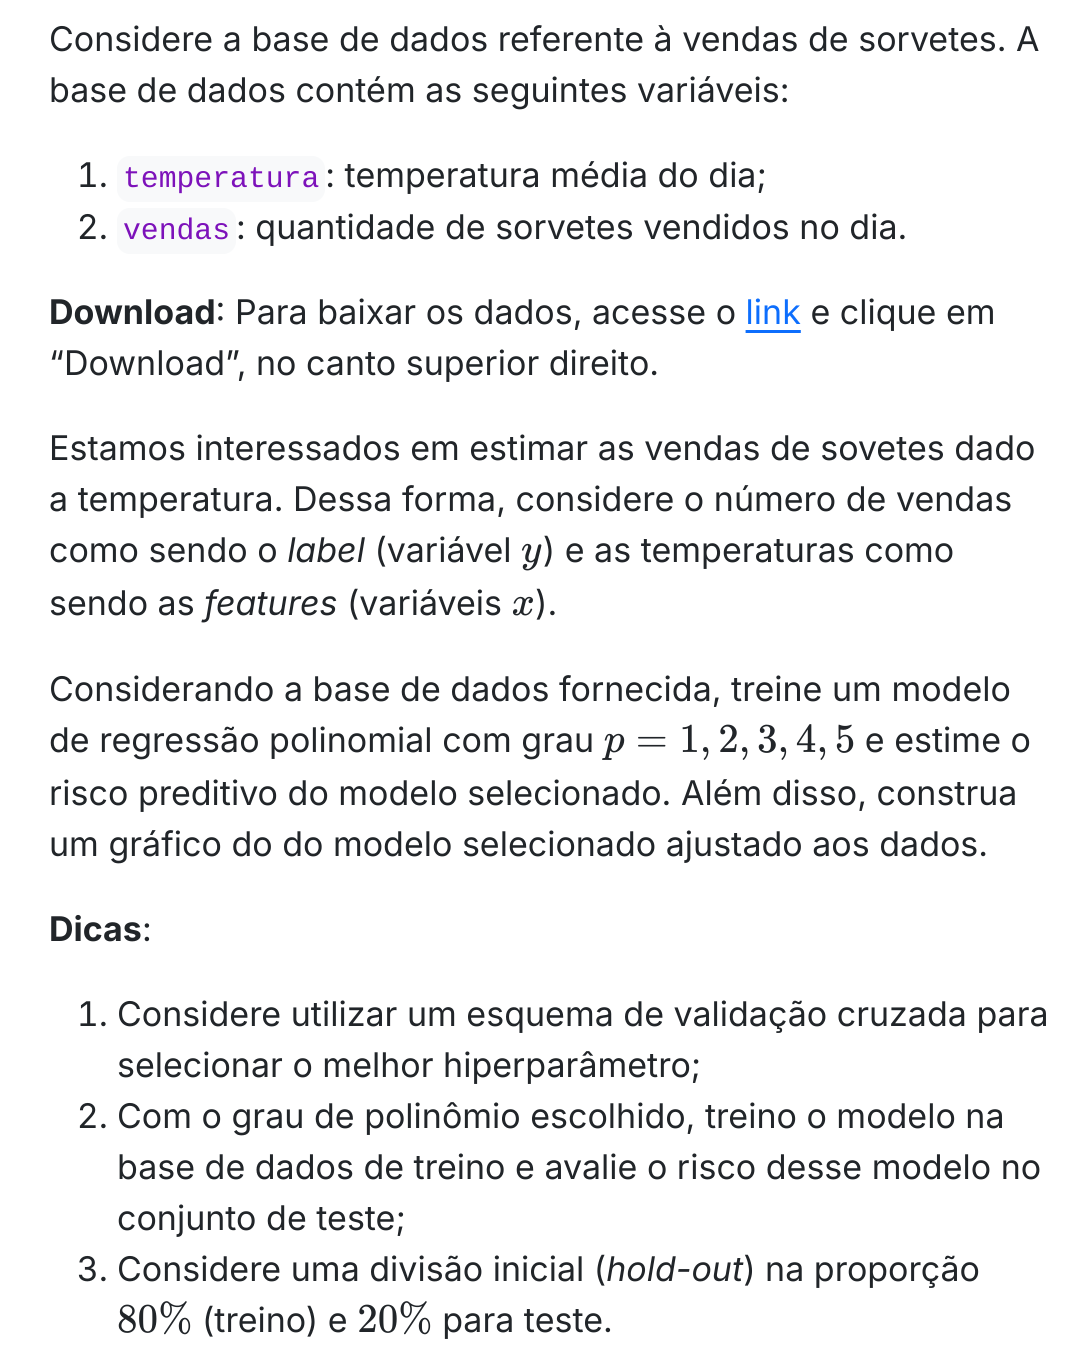


In [500]:
#Lendo conjunto de dados
dados = pd.read_csv('/home/diogo/Downloads/venda_sorvete/Ice_cream selling data.csv')

In [501]:
# head retorna as primeiras observações
dados.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [502]:
# Verificando se há algum valor faltante
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [503]:
# Importando função para validação cruzada
from sklearn.model_selection import cross_val_score

In [504]:
# Separando os valores de cada tabela nas minhas variáveis
# X = Features
# y = labels
X = dados[['Temperature (°C)']].values
y = dados['Ice Cream Sales (units)'].values

In [505]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [506]:
graus = [1, 2, 3, 4, 5]
eqm = []

for grau in graus:
    # Transformar as features em polinomiais
    poly = PolynomialFeatures(degree=grau)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Criar e treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Avaliar o modelo usando validação cruzada
    cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    eqm.append(-np.mean(cv_scores))

# Selecionar o grau com o menor erro médio quadrático
melhor_grau = degrees[np.argmin(eqm)]
print(f"O melhor grau de polinômio é: {melhor_grau}")


O melhor grau de polinômio é: 2


##### Avaliando o modelo no conjunto de teste

In [507]:
# Transformar as features com o melhor grau de polinômio
poly = PolynomialFeatures(degree=melhor_grau)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Treinar o modelo final com o melhor grau
best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test_poly)

# Calcular o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrático no conjunto de teste: {mse}")

Erro Médio Quadrático no conjunto de teste: 14.87879644098147


##### Visualização dos dados

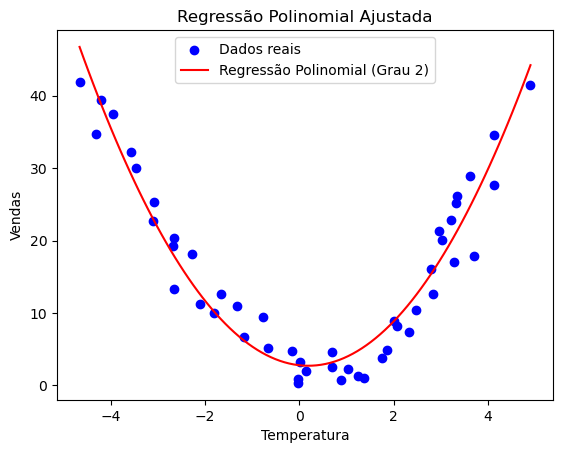

In [508]:
# Plotar os dados e a linha de ajuste
plt.scatter(X, y, color='blue', label='Dados reais')

# Criar uma faixa de valores para a previsão
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range = best_model.predict(x_range_poly)

plt.plot(x_range, y_range, color='red', label=f'Regressão Polinomial (Grau {melhor_grau})')
plt.xlabel('Temperatura')
plt.ylabel('Vendas')
plt.title('Regressão Polinomial Ajustada')
plt.legend()
plt.show()

### Questão 5:

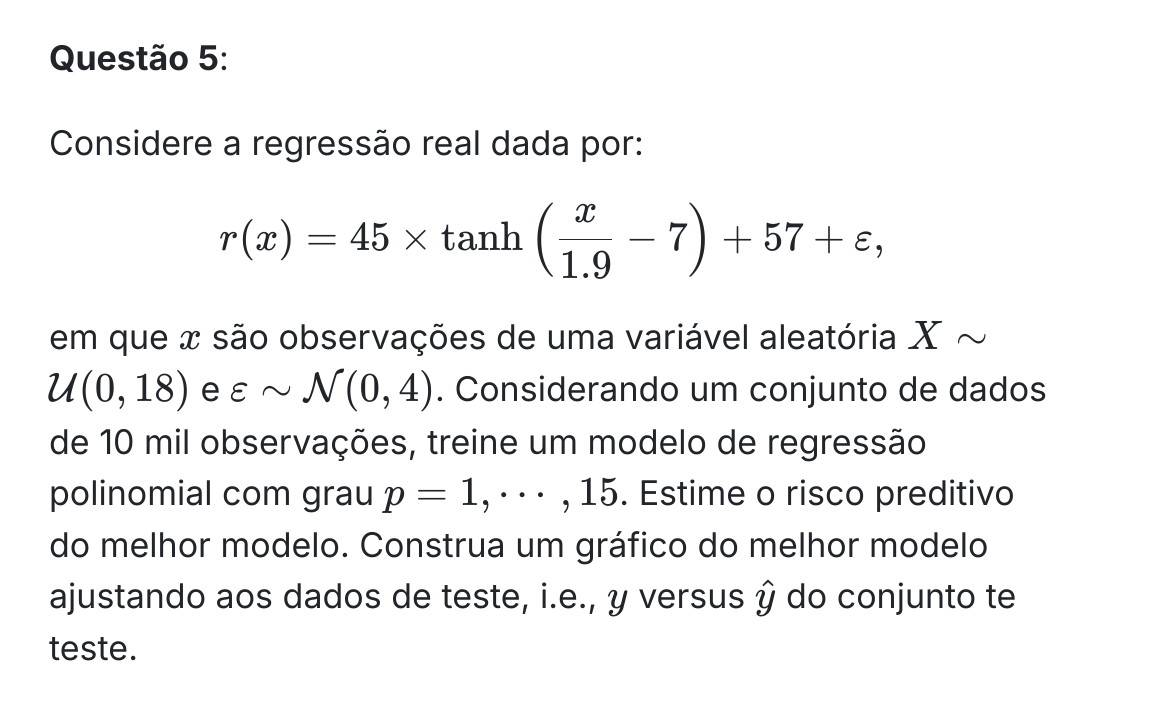


##### Gerando conjunto de dados

In [509]:
import numpy as np

def gerar_dados(seed: int = 0, n: int = 10000, erro: float = 2.0) -> tuple[np.ndarray, np.ndarray]:
    # Definir a semente para reprodutibilidade
    np.random.seed(seed)

    # Gerar os dados
    X = np.random.uniform(0, 18, n)
    erro = np.random.normal(0, erro, n)  # Nota: erro = 2

    # Calcular y
    y = 45 * np.tanh(X / 1.9 - 7) + 57 + erro
    
    return X, y

# Exemplo de uso
X, y = gerar_dados()


In [510]:
# Dividindo conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [511]:
# Função para treinar e avaliar modelos de regressão polinomial
def avaliar_modelo_polinomial(grau, X_train, y_train):
    # Garantir que X_train seja 2D
    X_train = X_train.reshape(-1, 1)
    
    # Gerar características polinomiais
    poly = PolynomialFeatures(grau)
    X_poly_train = poly.fit_transform(X_train)
    
    # Ajustar o modelo
    modelo = LinearRegression()
    modelo.fit(X_poly_train, y_train)
    
    # Fazer previsões
    y_pred_train = modelo.predict(X_poly_train)
    
    # Calcular o EQM de treinamento
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    return modelo, poly, mse_train

# Avaliar polinômios de grau 1 a 15
graus = range(1, 16)
mse_train = []
modelos = []
polys = []

for grau in graus:
    modelo, poly, mse = avaliar_modelo_polinomial(grau, X_train, y_train)
    modelos.append(modelo)
    polys.append(poly)
    mse_train.append(mse)

# Encontrar o melhor modelo (menor EQM)
melhor_grau = graus[np.argmin(mse_train)]
melhor_modelo = modelos[np.argmin(mse_train)]
melhor_poly = polys[np.argmin(mse_train)]

print(f"Melhor grau de polinômio: {melhor_grau}")
print(f"EQM de treinamento do melhor modelo: {min(mse_train)}")


Melhor grau de polinômio: 15
EQM de treinamento do melhor modelo: 3.932288583455251


##### Estimar risco preditivo no conjunto de teste

In [512]:
# Garantir que X_test seja 2D
X_test = X_test.reshape(-1, 1)

# Gerar características polinomiais para o conjunto de test
X_poly_test = melhor_poly.transform(X_test)

# Fazer previsões com o melhor modelo
y_pred_test = melhor_modelo.predict(X_poly_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"EQM de test do melhor modelo: {mse_test}")


EQM de test do melhor modelo: 4.013516813310899


/tmp/ipykernel_9699/1206192645.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


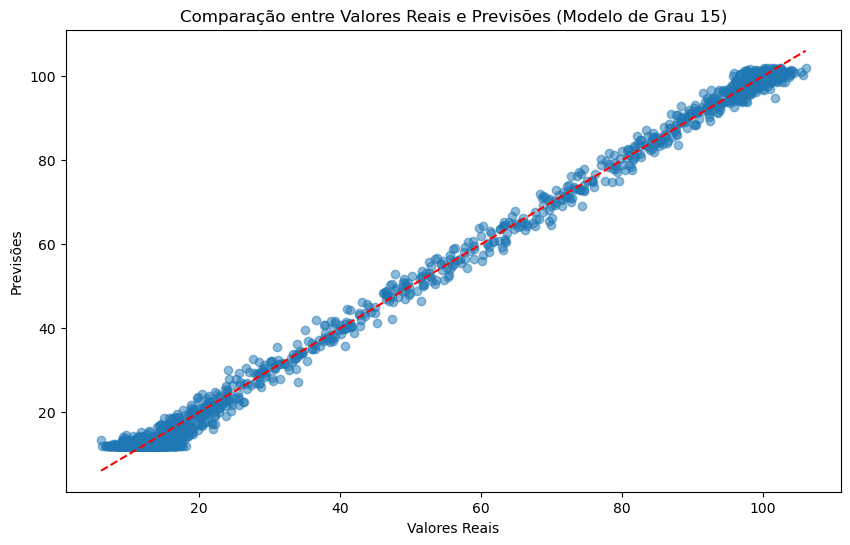

In [513]:
# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title(f'Comparação entre Valores Reais e Previsões (Modelo de Grau {melhor_grau})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.show()


In [514]:
from sklearn.model_selection import cross_val_score

# Função para calcular o EQM médio com validação cruzada
def calcular_mse_cruzado(grau, X, y):
    # Garantir que X seja 2D
    X = X.reshape(-1, 1)
    
    # Gerar características polinomiais
    poly = PolynomialFeatures(grau)
    X_poly = poly.fit_transform(X)
    
    # Ajustar o modelo
    modelo = LinearRegression()
    
    # Calcular o EQM médio com validação cruzada
    mse = -cross_val_score(modelo, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    return mse.mean()


In [515]:
# Avaliar polinômios de grau 1 a 15
mse_cruzado_lista = []

for grau in graus:
    mse = calcular_mse_cruzado(grau, X_train, y_train)
    mse_cruzado_lista.append(mse)

# Encontrar o melhor grau com validação cruzada
melhor_grau_cv = graus[np.argmin(mse_cruzado_lista)]

print(f"Melhor grau de polinômio com validação cruzada: {melhor_grau_cv}")
print(f"EQM médio com validação cruzada do melhor modelo: {min(mse_cruzado_lista)}")


Melhor grau de polinômio com validação cruzada: 15
EQM médio com validação cruzada do melhor modelo: 3.948750122061598
